1\. Write a function that converts number representation, bin<->dec<->hex. (Clearly using the corresponding python built-in functions is not fair..)

In [7]:
# input should be a string (that is exactly the return type of bin(), hex() )

decode = ["0","1","2","3","4","5","6","7","8","9","a", "b", "c", "d", "e", "f"]
#convert from a basis b to decimal
def toDec(n : str, b: int) -> int:
    res = 0
    c = 0
    for bit in str(n)[::-1]:
        res += decode.index(bit)*pow(b,c)
        c = c+1
    return res

#convert from decimal to a generic basis b
def fromDec(n : int, b : int) -> str:
    res = ""
    while (n != 0):
        rn = n % b
        n = n // b
        res = res + decode[rn]
    res = res
    return res[::-1]

# convert between two different basis bi, bf
def convert(n, bi, bf):
    return fromDec(toDec(n, bi), bf)

    
#Examples: 
print(toDec("100",2), "should be", int(0b100))
print(toDec("1101001",2), "should be", 0b1101001)
print(toDec("100",16), "should be", 0x100)
print(toDec("d1ae",16), "should be", 0xd1ae)

print(fromDec(123, 2), "should be", bin(123)[2::])
print(fromDec(241, 2), "should be", bin(241)[2::])
print(fromDec(241, 16), "should be", hex(241)[2::])
print(fromDec(1549, 16), "should be", hex(1549)[2::])

print(convert("d1ae", 16, 2), "should be", bin(int(0xd1ae))[2::])


4 should be 4
105 should be 105
256 should be 256
53678 should be 53678
1111011 should be 1111011
11110001 should be 11110001
f1 should be f1
60d should be 60d
1101000110101110 should be 1101000110101110


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [5]:
def toFloat(word):
    sign = word >> 31 & 0b1
    exp = word >> 23 & 0b011111111
    mant = word & 0b11111111111111111111111
    #binary converter for the mantissa part
    mantPart = 1
    c = 1
    for bit in (bin(mant))[2:]:
        mantPart = mantPart + int(bit)*pow(2,-c)
        c = c+1
        
    #binary converter for the exponent part
    expPart = 0
    c = 0
    for bit in str(bin(exp))[::-1][:-2]:
        expPart = expPart + int(bit)*pow(2,c)
        c = c+1
    expPart = pow(2, expPart - 127)
    # or just re-use the previous function 
    # expPart = pow(2, binToDec(exp)-127)
    return pow(-1, sign)*expPart*mantPart
    
print(toFloat(0b00010010110111010100001101010101), " should be 1.396365943153319011187892E-27")

1.396365943153319e-27  should be 1.396365943153319011187892E-27


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [16]:
# Defining the overflow and underflow of floats
import math
import sys
a, b = 1.,1.

counter = 0
while (a != 0):
    a = a/2
    counter = counter + 1
    
print("Smallest float/underflow:", pow(2,-counter+1))
print(sys.getsizeof(pow(2,-counter+1)))

counter = 0
while (b != math.inf):
    b = b*2
    counter = counter + 1
    
print("Largest float/underflow:", pow(2,counter-1))


Smallest float/underflow: 5e-324
24
Largest float/underflow: 89884656743115795386465259539451236680898848947115328636715040578866337902750481566354238661203768010560056939935696678829394884407208311246423715319737062188883946712432742638151109800623047059726541476042502884419075341171231440736956555270413618581675255342293149119973622969239858152417678164812112068608


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [23]:
b = 2
epsilon = 0.1
while (b != b+epsilon):
    epsilon = epsilon/2
print(epsilon)

1.7763568394002506e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [7]:
import math

# In this case, I'm subtracting two very large numbers at the numerator for s1, the first solution. This will cause some numerical
# problem
def solve(a,b,c):
    s1 = (-b + math.sqrt(b*b-4*a*c)) / (2*a)
    s2 = -(b + math.sqrt(b*b-4*a*c)) / (2*a)
    return [s1,s2]

# By multiplying by that factor, now s1 is no more a problem. Instead, a subtraction of very large numbers occurs in s2
def solve2(a,b,c):
    s1 = -(2*c)/(b + math.sqrt(b*b-4*a*c))
    s2 = (2*c)/(-b + math.sqrt(b*b-4*a*c))
    return [s1,s2]

# Combining the two methods, I get a fully stable algorithm
def stable_solve(a,b,c):
    s1 = -(2*c)/(b + math.sqrt(b*b-4*a*c))
    s2 = -(b + math.sqrt(b*b-4*a*c)) / (2*a)
    return [s1,s2]

print(solve(0.001, 1000, 0.001))
print(solve2(0.001, 1000, 0.001))
print(stable_solve(0.001,1000,0.001))

[-9.999894245993346e-07, -999999.999999]
[-1.000000000001e-06, -1000010.5755125057]
[-1.000000000001e-06, -999999.999999]


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?


Formally, catastrophic cancellation happens because subtraction is ill-conditioned with nearby inputs

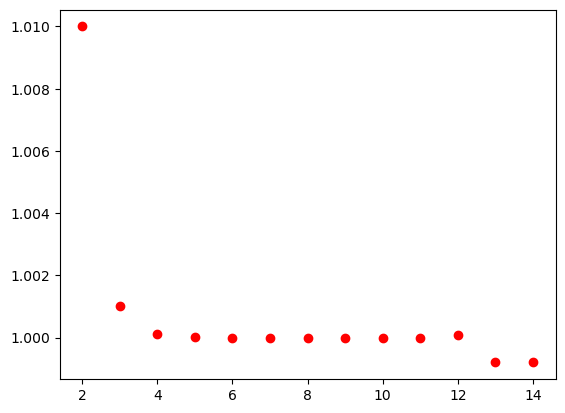

In [27]:
import matplotlib.pyplot as plt

def f(x):
    return x*(x-1)

def df_exact(x):
    return 2*x*x-1

def df(x):
    return (f(x+delta)-f(x)) / delta

derivatives = []
for i in range(2, 15):
    delta = pow(10,-i)
    derivatives.append(df(1))

plt.plot(range(2,15), derivatives, "or")
plt.show()

# When delta is really small, then I'll be subtracting two quantities that are really close to each other
# That may be a source of numerical instability

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [25]:
import math
N = 100

def f(x):
    return math.sqrt(1-x*x)


def integrate(N):
    I = 0
    for i in range(0,N):
        I += f(-1 + 2*i/N)* 2 / N
    return I

true_value = math.pi/2
print(integrate(N), ", ",(true_value-integrate(N))/true_value, "%")
print("When N = 100, the result is correct up to the third decimal digit")

1.5691342555492505 ,  0.0010581074180619238 %
When N = 100, the result is correct up to the third decimal digit


AttributeError: Line2D.set() got an unexpected keyword argument 'y'

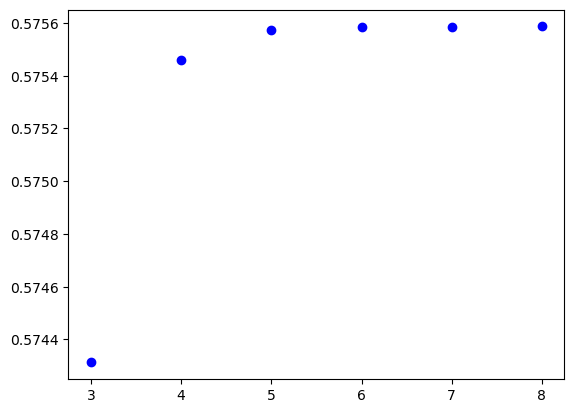

In [29]:
accuracies = []
for N in range(3,9):
    accuracies.append((true_value-integrate(pow(10,N)))/true_value)

plt.plot(range(3,9), accuracies, "ob")
plt.axvline(y = math.pi/2)
plt.show()